/nfs/home/justin/RF-Solver-Edit-Diffusers/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 3/3 [00:00<00:00, 52.63it/s]it/s]
You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers
 86%|████████▌ | 24/28 [00:13<00:02,  1.73it/s]


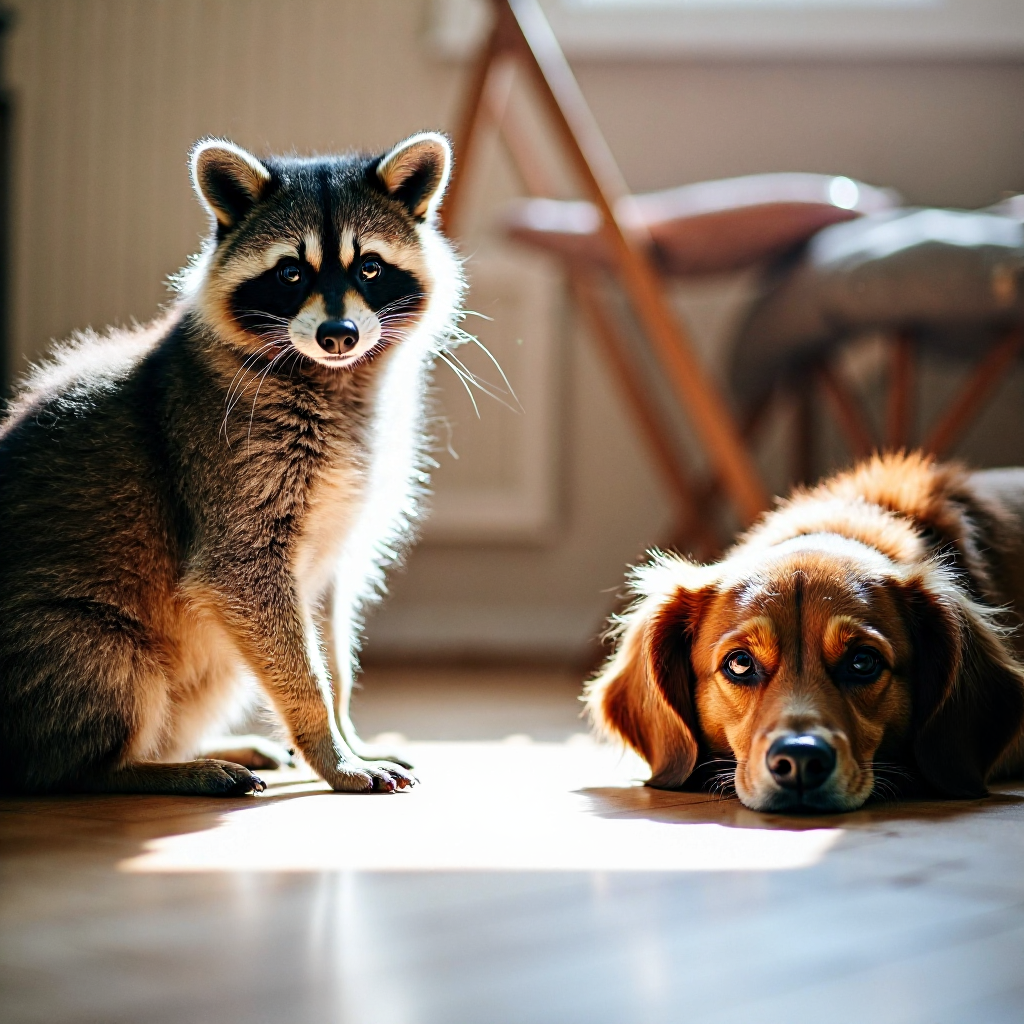

In [ ]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import torch
import diffusers
from pipeline import FlowEditFluxPipeline

diffusers.utils.logging.set_verbosity_error()

pipe = FlowEditFluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16)
pipe.to("cuda")

source_img = "assets/sources/cat_and_dog.png"
source_prompt = "A gray cat and a brown dog on a floor, some distance between them. The dog is laying on the floor, while the cat is sitting. The cat is positioned on the left side of the scene, while the dog is on the right side. Both pets looking at the camera."
target_prompt = "A raccoon and a brown dog on a floor, some distance between them. The dog is laying on the floor, while the raccoon is sitting. The raccoon is positioned on the left side of the scene, while the dog is on the right side. Both animals looking at the camera."

image = pipe(
    source_img,
    source_prompt,
    target_prompt,
    source_guidance_scale=1.5,
    target_guidance_scale=5.5,
    interpolate_start_step=0,
    interpolate_end_step=24,
    num_inference_steps=28,
).images[0]
image.save("assets/results/cat_and_dog_flowedit.jpg")
image